In [2]:
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

# 전처리한 결과 가져오기 (전처리는 data_preprocessing.ipynb)
data_file_name = 'preprocessed.csv'
points = pd.read_csv(data_file_name)
print(len(points))


5820310


In [9]:
# 시각화 함수
def draw_graph(data, size = None, key = None, plot_angle = None):
    assert (key == None or len(key) == 2 or len(key) == 3), "Key size must be 2 or 3"
    assert (plot_angle == None or len(plot_angle) ==2), "plot angle length must be 2"
    
    
    size = len(data) if size ==None else size
    color = ['FF0000', '00FF00', '0000FF','00FFFF', 'FF00FF', 'FFFF00','000FFF', 'F000FF', 'FF000F','FFF000']#, 'green', 'gray', 'purple']
    
    is_3d = (len(data.keys()) == 4)
    if key == None:
        key = ['pc0', 'pc1']
        x = data['pc0'][:size]
        y = data['pc1'][:size]
        if is_3d:
            z = data['pc2'][:size]
            key += ['pc2']
    else: # key 값이 수동으로 들어온 경우
        
        is_3d = (len(key) == 3)
        x = data[key[0]][:size]
        y = data[key[1]][:size]
        if is_3d:
            z = data[key[2]][:size]
            

    label = data['cluster']


    # df = pd.read_csv('2016.csv')
    sns.set(style = "darkgrid")

    fig = plt.figure(figsize=(10, 10))
    
    if is_3d:
        ax = fig.add_subplot(111, projection = '3d')
    else:
        ax = fig.add_subplot(111)

    ax.set_xlabel(key[0])
    ax.set_ylabel(key[1])
    if is_3d:
        ax.set_zlabel(key[2])

    label_color = ["#"+color[l] for l in list(label[:size])]

    # for i in range(len(x))
    if is_3d:
        ax.scatter(x, y, z, color=label_color)
        if plot_angle is not None:
            ax.view_init(plot_angle[0], plot_angle[1])
    else:
        ax.scatter(x, y, color=label_color)
    plt.show()    

In [4]:
from sklearn.cluster import KMeans 

# K-means clustering
def myKmeans(n_clusters, points):
    n_clusters = 6

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(points.values)

    # 결과 확인
    result_by_sklearn = points.copy()
    result_by_sklearn["cluster"] = kmeans.labels_
    result_by_sklearn.head()
    centers = kmeans.cluster_centers_

    return result_by_sklearn, centers

In [5]:
from sklearn.decomposition import PCA

# PCA 함수
def myPCA(n_components, points):
    pca = PCA(n_components=n_components) # 주성분을 몇개로 할지 결정
    printcipalComponents = pca.fit_transform(points)
    colums_name = ["pc"+str(i) for i in range(n_components)]
    principalDf = pd.DataFrame(data=printcipalComponents, columns = colums_name)
    
    return pca, principalDf

In [6]:
pca_dim = 3
pca, pca_output = myPCA(pca_dim, points)

In [7]:
k = 6
result_by_kmeans, centers = myKmeans(k, points)

In [16]:
if 'cluseter' not in pca_output.keys():
    pca_output['cluster'] = result_by_kmeans['cluster']

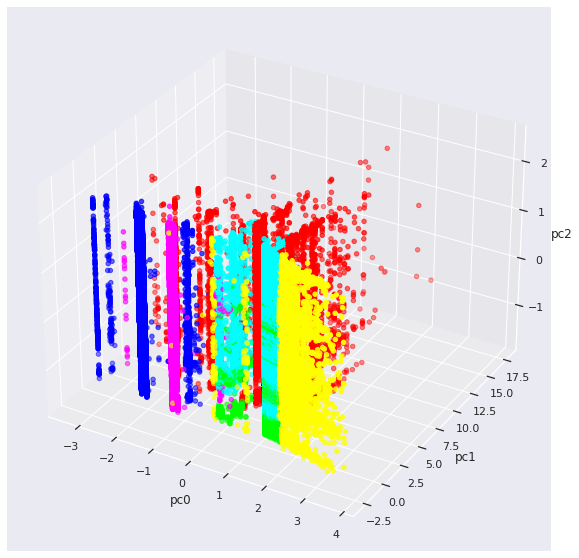

In [20]:
draw_graph(pca_output, size = 100000)